Fitting amplitudes using scipy wrapper library [lmfit](https://lmfit.github.io/lmfit-py/)

In [107]:
from lmfit import Parameters

paramsR = Parameters()
paramsL = Parameters()
paramsC = Parameters()
# paramsR.add('R_r',96.7, min=950, max=1100)
# paramsR.add('R',.17252e+03, min=1e03, max=3e03)
# paramsR.add('L',.741e-02, min=3.6e-02, max=5.5e-02)
# paramsR.add('C',.46e-09, min=1e-09, max=2e-09)
# paramsR.add('V_0'.2,min=1, max=2)
paramsR.add('R_r',min=950, max=1100)
paramsR.add('R',min=1e03, max=3e03)
paramsR.add('L',min=3.6e-02, max=5.5e-02)
paramsR.add('C',min=1e-09, max=2e-09)
paramsR.add('V_0',min=0, max=5)

paramsL.add('R',min=1e03, max=3e03)
paramsL.add('L', min=3.6e-02, max=5.5e-02)
paramsL.add('C', min=1e-09, max=2e-09)
paramsL.add('V_0',min=0, max=5)

paramsC.add('R',min=1e03, max=3e03)
paramsC.add('L',.741e-02, min=3.6e-02, max=5.5e-02)
paramsC.add('C', min=1e-09, max=2e-09)
paramsC.add('V_0',min=0, max=5)


R

[[Model]]
    Model(R_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 986
    # variables        = 5
    chi-square         = 3.29566198
    reduced chi-square = 0.00335949
    Akaike info crit   = -5611.23461
    Bayesian info crit = -5586.76633
##  Warning: uncertainties could not be estimated:
    R_r:  at initial value
    R_r:  at boundary
    L:    at initial value
    L:    at boundary
    C:    at initial value
    C:    at boundary
[[Variables]]
    R_r:  950.000000 (init = 950)
    R:    1473.80192 (init = 1000)
    L:    0.03600000 (init = 0.036)
    C:    1.9605e-09 (init = 1e-09)
    V_0:  1.78859044 (init = 0)
L

[[Model]]
    Model(L_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 986
    # variables        = 4
    chi-square         = 14367.4490
    reduced chi-square = 14.6308035
    Akaike info crit   = 2649.55719
    Bayesian info

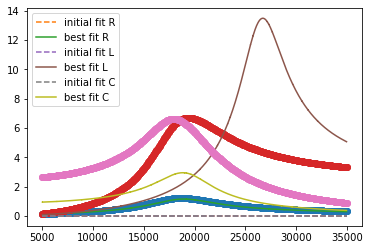

In [108]:
import numpy as np

import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

file_folder = 'data/actual data/Frequency response/'
file_name = 'amplitudes1.csv'
data_file = file_folder + file_name
x,ampGen,ampR,ampL,ampC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4), unpack = True)

def R_amp_model(x, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*x* L - 1/(2*np.pi*x* C))**2)
    return num / den
def L_amp_model(x, R, L, C, V_0):
    num = 2*np.pi*f * L * V_0
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den
def C_amp_model(x, R, L, C, V_0):
    num = V_0 / (2*np.pi*f * C)
    den = np.sqrt( R**2 + (2*np.pi*f * L - 1/(2*np.pi*f * C))**2)
    return num / den

Rmodel = Model(R_amp_model)
Lmodel = Model(L_amp_model)
Cmodel = Model(C_amp_model)

resultR = Rmodel.fit(ampR,x=x,params=paramsR)
resultL = Lmodel.fit(ampL,x=x,params=paramsL)
resultC = Cmodel.fit(ampC,x=x,params=paramsC)

print('R\n')
print(resultR.fit_report())
print('L\n')
print(resultL.fit_report())
print('C\n')
print(resultC.fit_report())
plt.plot(x, ampR, 'o')
plt.plot(x, resultR.init_fit, '--', label='initial fit R')
plt.plot(x, resultR.best_fit, '-', label='best fit R')
plt.plot(x, ampL, 'o')
plt.plot(x, resultL.init_fit, '--', label='initial fit L')
plt.plot(x, resultL.best_fit, '-', label='best fit L')
plt.plot(x, ampC, 'o')
plt.plot(x, resultC.init_fit, '--', label='initial fit C')
plt.plot(x, resultC.best_fit, '-', label='best fit C')
plt.legend()

plt.savefig('figs/amplitudes.pdf')
plt.show()


R

[[Model]]
    Model(R_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 986
    # variables        = 5
    chi-square         = 0.06029889
    reduced chi-square = 6.1467e-05
    Akaike info crit   = -9556.26855
    Bayesian info crit = -9531.80027
##  Warning: uncertainties could not be estimated:
    R_r:  at initial value
    R_r:  at boundary
    L:    at initial value
    L:    at boundary
    C:    at initial value
    C:    at boundary
[[Variables]]
    R_r:  950.000000 (init = 950)
    R:    1552.71444 (init = 1473.802)
    L:    0.03600000 (init = 0.036)
    C:    1.9857e-09 (init = 1.960508e-09)
    V_0:  2.00815928 (init = 1.78859)
L

[[Model]]
    Model(L_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 986
    # variables        = 4
    chi-square         = 2.53669566
    reduced chi-square = 0.00258319
    Akaike info crit   = -5871.31493

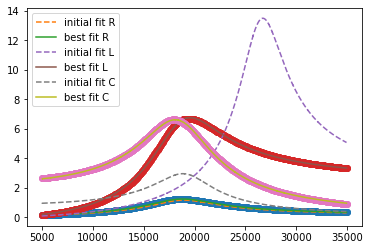

In [109]:
paramsR = resultR.params
paramsL = resultL.params
paramsC = resultC.params

resultR = Rmodel.fit(ampR,x=x,params=paramsR)
resultL = Lmodel.fit(ampL,x=x,params=paramsL)
resultC = Cmodel.fit(ampC,x=x,params=paramsC)

print('R\n')
print(resultR.fit_report())
print('L\n')
print(resultL.fit_report())
print('C\n')
print(resultC.fit_report())
plt.plot(x, ampR, 'o')
plt.plot(x, resultR.init_fit, '--', label='initial fit R')
plt.plot(x, resultR.best_fit, '-', label='best fit R')
plt.plot(x, ampL, 'o')
plt.plot(x, resultL.init_fit, '--', label='initial fit L')
plt.plot(x, resultL.best_fit, '-', label='best fit L')
plt.plot(x, ampC, 'o')
plt.plot(x, resultC.init_fit, '--', label='initial fit C')
plt.plot(x, resultC.best_fit, '-', label='best fit C')
plt.legend()

plt.savefig('figs/amplitudes.pdf')
plt.show()